In [1]:
import pandas as pd
import numpy
import re

In [50]:
adj=pd.read_csv('./mecab_adj_total.csv',encoding='utf-8')
adj

,keyword,mecab_adj2
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...
...,...,...
561,오륙도,괜찮다 춥다 빠르다 좋다 있다 넓...
562,이기대,넓다 같다 있다 좋다 작다 같다 ...
563,장산,같다 편하다 있다 같다 있다 있다...
564,태종대,없다 같다 좋다 같다 길다 있다 ...


In [51]:
adj['adj_unique']=adj['mecab_adj2'].apply(lambda x: set(x.split()))

In [52]:
adj

,keyword,mecab_adj2,adj_unique
0,168계단,있다 없다 있다 없다 비싸다 멀다...,"{맛없다, 무덥다, 힘들다, 인상깊다, 있다, 무섭다, 빠르다, 조그맣다, 없다, ..."
1,25의용단,좋다 없다 없다 없다 없다 같다 ...,"{낮다, 편하다, 작다, 인상깊다, 있다, 헛되다, 굵다, 괜찮다, 어둡다, 빠르다..."
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...,"{맛없다, 아쉬우다, 힘들다, 눈부시다, 인상깊다, 있다, 무섭다, 어둡다, 두껍다..."
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...,"{맛없다, 무덥다, 힘들다, 인상깊다, 있다, 무섭다, 어둡다, 빠르다, 없다, 급..."
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...,"{아쉬우다, 맛없다, 힘들다, 있다, 두껍다, 빠르다, 없다, 급하다, 가볍다, 귀..."
...,...,...,...
561,오륙도,괜찮다 춥다 빠르다 좋다 있다 넓...,"{아쉬우다, 안타깝다, 맛없다, 힘들다, 저리다, 인상깊다, 있다, 부럽다, 무섭다..."
562,이기대,넓다 같다 있다 좋다 작다 같다 ...,"{미심쩍다, 안타깝다, 덜하다, 커다랗다, 힘들다, 저리다, 비리다, 있다, 부럽다..."
563,장산,같다 편하다 있다 같다 있다 있다...,"{맛없다, 안타깝다, 아쉬우다, 힘들다, 있다, 무섭다, 쌔다, 빠르다, 없다, 귀..."
564,태종대,없다 같다 좋다 같다 길다 있다 ...,"{커다랗다, 힘들다, 비리다, 있다, 부럽다, 무섭다, 빠르다, 쨍하다, 쎄다, 없..."


In [61]:
adj['mecab_adj2'][340]

'   없다      있다      놀랍다   '

In [62]:
type(adj['adj_unique'][0])

set

In [63]:
adj['adj_unique']=adj['adj_unique'].apply(lambda x: str(x).replace('{', '[').replace('}', ']'))

In [64]:
adj['adj_unique']=adj['adj_unique'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

In [65]:
adj['adj_unique']=adj['adj_unique'].map(lambda x : (re.sub(' +', ' ', x)))

In [68]:
adj=adj.set_index('keyword')

KeyError: "None of ['keyword'] are in the columns"

In [70]:
adj

,mecab_adj2,adj_unique
keyword,,
168계단,있다 없다 있다 없다 비싸다 멀다...,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 빠르다 조그맣다 없다 춥다 급하다 귀엽...
25의용단,좋다 없다 없다 없다 없다 같다 ...,낮다 편하다 작다 인상깊다 있다 헛되다 굵다 괜찮다 어둡다 빠르다 가깝다 밝다 부...
40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...,맛없다 아쉬우다 힘들다 눈부시다 인상깊다 있다 무섭다 어둡다 두껍다 빠르다 없다 ...
40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 어둡다 빠르다 없다 급하다 귀엽다 가볍...
60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...,아쉬우다 맛없다 힘들다 있다 두껍다 빠르다 없다 급하다 가볍다 귀엽다 힘드다 아쉽...
...,...,...
오륙도,괜찮다 춥다 빠르다 좋다 있다 넓...,아쉬우다 안타깝다 맛없다 힘들다 저리다 인상깊다 있다 부럽다 무섭다 빠르다 쎄다 ...
이기대,넓다 같다 있다 좋다 작다 같다 ...,미심쩍다 안타깝다 덜하다 커다랗다 힘들다 저리다 비리다 있다 부럽다 무섭다 어둡다...
장산,같다 편하다 있다 같다 있다 있다...,맛없다 안타깝다 아쉬우다 힘들다 있다 무섭다 쌔다 빠르다 없다 귀엽다 가볍다 아쉽...


In [71]:
adj=adj.drop(columns=['mecab_adj2'])


In [73]:
adj

,adj_unique
keyword,
168계단,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 빠르다 조그맣다 없다 춥다 급하다 귀엽...
25의용단,낮다 편하다 작다 인상깊다 있다 헛되다 굵다 괜찮다 어둡다 빠르다 가깝다 밝다 부...
40계단 문화관,맛없다 아쉬우다 힘들다 눈부시다 인상깊다 있다 무섭다 어둡다 두껍다 빠르다 없다 ...
40계단 문화관광테마거리,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 어둡다 빠르다 없다 급하다 귀엽다 가볍...
60년전통 할매국밥,아쉬우다 맛없다 힘들다 있다 두껍다 빠르다 없다 급하다 가볍다 귀엽다 힘드다 아쉽...
...,...
오륙도,아쉬우다 안타깝다 맛없다 힘들다 저리다 인상깊다 있다 부럽다 무섭다 빠르다 쎄다 ...
이기대,미심쩍다 안타깝다 덜하다 커다랗다 힘들다 저리다 비리다 있다 부럽다 무섭다 어둡다...
장산,맛없다 안타깝다 아쉬우다 힘들다 있다 무섭다 쌔다 빠르다 없다 귀엽다 가볍다 아쉽...


In [74]:
adj.to_csv('./adj_split2.csv',encoding='utf-8')

In [75]:
adj_split=pd.read_csv('./adj_split2.csv',encoding='utf-8',index_col=0)
adj_split

,adj_unique
keyword,
168계단,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 빠르다 조그맣다 없다 춥다 급하다 귀엽...
25의용단,낮다 편하다 작다 인상깊다 있다 헛되다 굵다 괜찮다 어둡다 빠르다 가깝다 밝다 부...
40계단 문화관,맛없다 아쉬우다 힘들다 눈부시다 인상깊다 있다 무섭다 어둡다 두껍다 빠르다 없다 ...
40계단 문화관광테마거리,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 어둡다 빠르다 없다 급하다 귀엽다 가볍...
60년전통 할매국밥,아쉬우다 맛없다 힘들다 있다 두껍다 빠르다 없다 급하다 가볍다 귀엽다 힘드다 아쉽...
...,...
오륙도,아쉬우다 안타깝다 맛없다 힘들다 저리다 인상깊다 있다 부럽다 무섭다 빠르다 쎄다 ...
이기대,미심쩍다 안타깝다 덜하다 커다랗다 힘들다 저리다 비리다 있다 부럽다 무섭다 어둡다...
장산,맛없다 안타깝다 아쉬우다 힘들다 있다 무섭다 쌔다 빠르다 없다 귀엽다 가볍다 아쉽...


In [47]:
adj_split['adj_unique'].str.len().to_clipboard()

In [76]:
adj_split['adj_unique'][340]

' 있다 없다 놀랍다 '

In [89]:
from collections import Counter

In [91]:
adj_split=adj_split.drop(columns=['adj_list'])

In [99]:
adj_split

,adj_unique
keyword,
168계단,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 빠르다 조그맣다 없다 춥다 급하다 귀엽...
25의용단,낮다 편하다 작다 인상깊다 있다 헛되다 굵다 괜찮다 어둡다 빠르다 가깝다 밝다 부...
40계단 문화관,맛없다 아쉬우다 힘들다 눈부시다 인상깊다 있다 무섭다 어둡다 두껍다 빠르다 없다 ...
40계단 문화관광테마거리,맛없다 무덥다 힘들다 인상깊다 있다 무섭다 어둡다 빠르다 없다 급하다 귀엽다 가볍...
60년전통 할매국밥,아쉬우다 맛없다 힘들다 있다 두껍다 빠르다 없다 급하다 가볍다 귀엽다 힘드다 아쉽...
...,...
오륙도,아쉬우다 안타깝다 맛없다 힘들다 저리다 인상깊다 있다 부럽다 무섭다 빠르다 쎄다 ...
이기대,미심쩍다 안타깝다 덜하다 커다랗다 힘들다 저리다 비리다 있다 부럽다 무섭다 어둡다...
장산,맛없다 안타깝다 아쉬우다 힘들다 있다 무섭다 쌔다 빠르다 없다 귀엽다 가볍다 아쉽...


In [98]:
adj_split['adj_unique'].sort_values().to_clipboard()

In [210]:
count = Counter(adj_split['adj_unique'].str.split(expand=True).stack())

print(count.most_common(218))

[('있다', 563), ('좋다', 562), ('같다', 560), ('없다', 558), ('많다', 557), ('작다', 542), ('크다', 539), ('맛있다', 539), ('넓다', 534), ('높다', 528), ('괜찮다', 523), ('길다', 521), ('힘들다', 518), ('아쉽다', 515), ('예쁘다', 515), ('편하다', 515), ('다', 514), ('르다', 513), ('늦다', 511), ('그렇다', 510), ('쉽다', 509), ('재밌다', 502), ('짧다', 501), ('맑다', 496), ('멀다', 488), ('적다', 487), ('빠르다', 485), ('싫다', 484), ('깊다', 472), ('이쁘다', 471), ('어렵다', 463), ('귀엽다', 460), ('가깝다', 457), ('좁다', 455), ('가볍다', 455), ('재미있다', 451), ('멋지다', 445), ('알차다', 443), ('즐겁다', 442), ('덥다', 441), ('멋있다', 440), ('밝다', 429), ('비싸다', 428), ('아름답다', 415), ('엄청나다', 414), ('나쁘다', 413), ('똑같다', 402), ('부드럽다', 389), ('춥다', 388), ('무섭다', 387), ('급하다', 387), ('젊다', 387), ('야무지다', 380), ('귀찮다', 380), ('맛나다', 379), ('낮다', 374), ('새롭다', 373), ('이렇다', 365), ('수많다', 364), ('바쁘다', 362), ('싸다', 361), ('얇다', 352), ('아프다', 339), ('붉다', 339), ('저렇다', 339), ('심하다', 337), ('세다', 326), ('반갑다', 320), ('맛없다', 318), ('부럽다', 311), ('지나치다', 309), ('흐리다', 306), ('강하다', 304), ('

In [211]:
adj_split['adj_102']=adj_split['adj_unique'].apply(lambda x: ' '.join([word for word in x.split() if count[word] > 102]))


In [214]:
adj_split['adj_102'].to_csv('./adj_count_102.csv',encoding='utf-8')

In [217]:
adj_split['adj_102']

keyword
168계단            맛없다 힘들다 인상깊다 있다 무섭다 빠르다 조그맣다 없다 춥다 급하다 귀엽다 손쉽다...
25의용단            낮다 편하다 작다 인상깊다 있다 굵다 괜찮다 어둡다 빠르다 가깝다 밝다 부끄럽다 없...
40계단 문화관         맛없다 아쉬우다 힘들다 눈부시다 인상깊다 있다 무섭다 어둡다 두껍다 빠르다 없다 급...
40계단 문화관광테마거리    맛없다 힘들다 인상깊다 있다 무섭다 어둡다 빠르다 없다 급하다 귀엽다 가볍다 갑작스...
60년전통 할매국밥       아쉬우다 맛없다 힘들다 있다 두껍다 빠르다 없다 급하다 가볍다 귀엽다 힘드다 아쉽다...
                                       ...                        
오륙도              아쉬우다 안타깝다 맛없다 힘들다 인상깊다 있다 부럽다 무섭다 빠르다 쎄다 춥다 없다...
이기대              안타깝다 덜하다 커다랗다 힘들다 비리다 있다 부럽다 무섭다 어둡다 빠르다 춥다 없다...
장산               맛없다 안타깝다 아쉬우다 힘들다 있다 무섭다 빠르다 없다 귀엽다 가볍다 아쉽다 그렇...
태종대              커다랗다 힘들다 비리다 있다 부럽다 무섭다 빠르다 쎄다 없다 춥다 급하다 가볍다 귀...
학리방파제            아쉬우다 힘들다 인상깊다 비리다 있다 부럽다 어둡다 빠르다 쎄다 없다 춥다 급하다 ...
Name: adj_102, Length: 566, dtype: object

In [112]:
count

Counter({'맛없다': 318,
         '무덥다': 78,
         '힘들다': 518,
         '인상깊다': 179,
         '있다': 563,
         '무섭다': 387,
         '빠르다': 485,
         '조그맣다': 126,
         '없다': 558,
         '춥다': 388,
         '급하다': 387,
         '귀엽다': 460,
         '손쉽다': 125,
         '힘드다': 243,
         '갑작스럽다': 128,
         '아쉽다': 515,
         '같다': 560,
         '그렇다': 510,
         '예쁘다': 515,
         '상관없다': 223,
         '알차다': 443,
         '아름답다': 415,
         '착하다': 220,
         '지나치다': 309,
         '멋있다': 440,
         '습하다': 202,
         '야무지다': 380,
         '흔하다': 183,
         '작다': 542,
         '이렇다': 365,
         '다': 514,
         '크다': 539,
         '식다': 14,
         '고프다': 283,
         '넓다': 534,
         '맛있다': 539,
         '높다': 528,
         '겉다': 196,
         '걸맞다': 195,
         '싫다': 484,
         '많다': 557,
         '쉽다': 509,
         '멀다': 488,
         '강하다': 304,
         '귀찮다': 380,
         '빡세다': 190,
         '뿌옇다': 136,
         '늦다': 511,
   

In [111]:
sum(count.values())

72244

In [198]:
adj_list=['많다',
'작다',
'크다',
'맛있다',
'넓다',
'높다',
'괜찮다',
'길다',
'힘들다',
'아쉽다',
'예쁘다',
'편하다',
'재밌다',
'짧다',
'맑다',
'깊다',
'이쁘다',
'귀엽다',
'재미있다',
'멋지다',
'알차다',
'즐겁다',
'멋있다',
'밝다',
'비싸다',
'아름답다',
'엄청나다',
'부드럽다',
'야무지다',
'맛나다',
'새롭다',
'붉다',
'반갑다',
'맛없다',
'부럽다',
'흐리다',
'고맙다',
'진하다',
'배부르다',
'뜨겁다',
'낫다',
'어둡다',
'놀랍다',
'시끄럽다',
'정신없다',
'낯설다',
'착하다',
'드넓다',
'알맞다',
'푸르다',
'차갑다',
'곱다',
'색다르다',
'습하다',
'슬프다',
'예뿌다',
'가파르다',
'정겹다',
'환하다',
'파랗다',
'인상깊다',
'배고프다',
'뜻깊다',
'드물다',
'그립다',
'과하다',
'힘차다',
'재미없다',
'기쁘다',
'부끄럽다',
'귀여우다',
'앙증맞다',
'귀하다',
'눈부시다',
'싱겁다',
'뛰어나다',
'기름지다',
'힘겹다',
'손쉽다',
'활기차다',
'세차다',
'외롭다',
'해맑다',
'남다르다',
'연하다',
'재미나다',
'험하다',
'슴슴하다'
]

In [199]:
adj_split[adj_split['adj_unique'].str.contains('많다|작다|크다')].to_clipboard()
# 안될경우 engine='python'추가

In [200]:
adj_split['adj_unique']

keyword
168계단             맛없다 무덥다 힘들다 인상깊다 있다 무섭다 빠르다 조그맣다 없다 춥다 급하다 귀엽...
25의용단             낮다 편하다 작다 인상깊다 있다 헛되다 굵다 괜찮다 어둡다 빠르다 가깝다 밝다 부...
40계단 문화관          맛없다 아쉬우다 힘들다 눈부시다 인상깊다 있다 무섭다 어둡다 두껍다 빠르다 없다 ...
40계단 문화관광테마거리     맛없다 무덥다 힘들다 인상깊다 있다 무섭다 어둡다 빠르다 없다 급하다 귀엽다 가볍...
60년전통 할매국밥        아쉬우다 맛없다 힘들다 있다 두껍다 빠르다 없다 급하다 가볍다 귀엽다 힘드다 아쉽...
                                       ...                        
오륙도               아쉬우다 안타깝다 맛없다 힘들다 저리다 인상깊다 있다 부럽다 무섭다 빠르다 쎄다 ...
이기대               미심쩍다 안타깝다 덜하다 커다랗다 힘들다 저리다 비리다 있다 부럽다 무섭다 어둡다...
장산                맛없다 안타깝다 아쉬우다 힘들다 있다 무섭다 쌔다 빠르다 없다 귀엽다 가볍다 아쉽...
태종대               커다랗다 힘들다 비리다 있다 부럽다 무섭다 빠르다 쨍하다 쎄다 없다 춥다 급하다 ...
학리방파제             아쉬우다 힘들다 인상깊다 비리다 있다 부럽다 어둡다 빠르다 쎄다 없다 춥다 급하다...
Name: adj_unique, Length: 566, dtype: object

In [201]:
adj_list = adj_list
remove = adj_split['adj_unique']

adj_list = [i for i in adj_list if i not in remove]
print(adj_list)

['많다', '작다', '크다', '맛있다', '넓다', '높다', '괜찮다', '길다', '힘들다', '아쉽다', '예쁘다', '편하다', '재밌다', '짧다', '맑다', '깊다', '이쁘다', '귀엽다', '재미있다', '멋지다', '알차다', '즐겁다', '멋있다', '밝다', '비싸다', '아름답다', '엄청나다', '부드럽다', '야무지다', '맛나다', '새롭다', '붉다', '반갑다', '맛없다', '부럽다', '흐리다', '고맙다', '진하다', '배부르다', '뜨겁다', '낫다', '어둡다', '놀랍다', '시끄럽다', '정신없다', '낯설다', '착하다', '드넓다', '알맞다', '푸르다', '차갑다', '곱다', '색다르다', '습하다', '슬프다', '예뿌다', '가파르다', '정겹다', '환하다', '파랗다', '인상깊다', '배고프다', '뜻깊다', '드물다', '그립다', '과하다', '힘차다', '재미없다', '기쁘다', '부끄럽다', '귀여우다', '앙증맞다', '귀하다', '눈부시다', '싱겁다', '뛰어나다', '기름지다', '힘겹다', '손쉽다', '활기차다', '세차다', '외롭다', '해맑다', '남다르다', '연하다', '재미나다', '험하다', '슴슴하다']


In [219]:
df=pd.read_csv('./adj_count_102_1.csv',encoding='utf-8')

In [222]:
df['adj_102']=df['adj_102'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

In [223]:
df['adj_102']=df['adj_102'].map(lambda x : (re.sub(' +', ' ', x)))

In [225]:
df.to_csv('./adj_count_102_2.csv',encoding='utf-8')

In [133]:
adj_list2=pd.read_csv('./adj_list2.csv',encoding='utf-8')


In [135]:
adj_list2['adj_list']=adj_list2['adj_list'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

In [139]:
adj_list2['adj_list']=adj_list2['adj_list'].str.strip()

In [140]:
adj_list2.to_clipboard()

In [101]:
from wordcloud import WordCloud
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

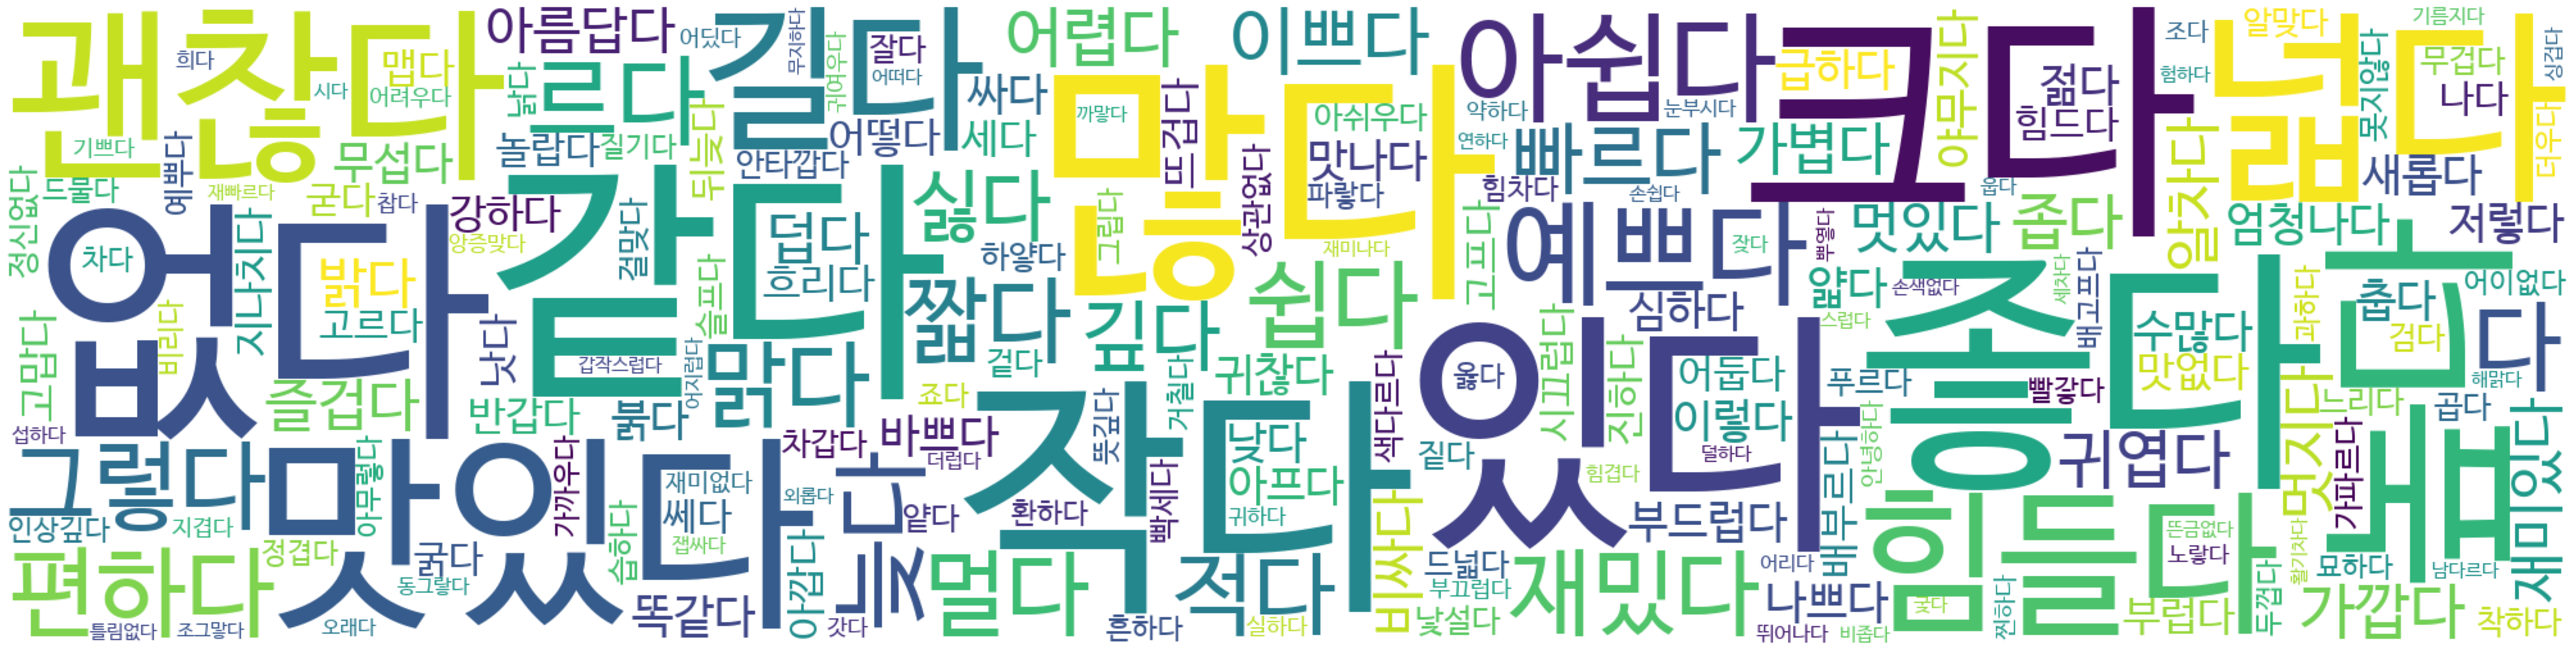

In [102]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()